In [1]:
import numpy as np
import pylab as plt
import cluster_toolkit
import math
%matplotlib inline

In [2]:
N = 730000
h = 0.7
r_0 = 5/h
a = 1.67
pi = 3.14159265359

In [3]:
k = np.logspace(np.log10(5.e-5), 3., N) # Wavenumber
b = 4*pi*(r_0**a)*math.sin(pi*a/2)*math.gamma(2-a)

In [4]:
nr = 1000
r = np.logspace(-1, 3, nr)

[]

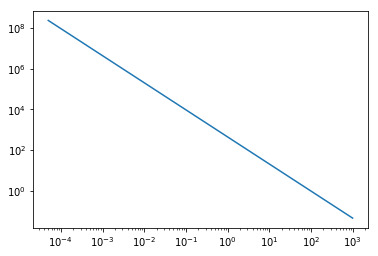

In [12]:
pk_list = []
for n in range(N):
    pk_list.append(b*k[n]**(a-3))
pk = np.asarray(pk_list)
plt.plot(k, pk)
plt.loglog()

In [6]:
xi_list = []
for n in range(nr):
    xi_list.append((r_0/r[n])**a)
xi = np.asarray(xi_list)

In [7]:
xi_T = cluster_toolkit.xi.xi_mm_at_R(h*r, k/h, pk*h*h*h, exact=True)
xi_F = cluster_toolkit.xi.xi_mm_at_R(h*r, k/h, pk*h*h*h, exact=False)

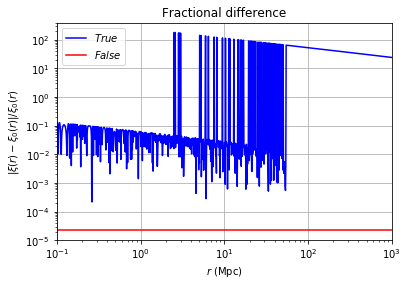

In [8]:
legarray = []

diff_T = np.abs((xi-xi_T)/xi)
diff_F = np.abs((xi-xi_F)/xi)
plt.plot(r, diff_T, 'b-')
legarray.append(r'$True$')
plt.plot(r, diff_F, 'r-')
legarray.append(r'$False$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r$ (Mpc)')
plt.ylabel(r'$|\xi (r)-\xi_0(r)|/\xi_0(r)$')
plt.xlim([0.1,1000])
#plt.ylim([1e-4,1e-2])
plt.grid()
plt.legend(legarray)
plt.title('Fractional difference') 
plt.show()

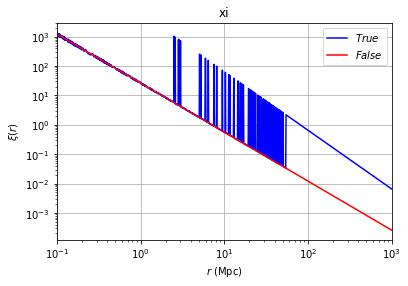

In [9]:
legarray = []

plt.plot(r, xi_T, 'b-')
legarray.append(r'$True$')
plt.plot(r, xi_F, 'r-')
legarray.append(r'$False$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r$ (Mpc)')
plt.ylabel(r'$\xi (r)$')
plt.xlim([0.1,1000])
#plt.ylim([1e-4,1e-2])
plt.grid()
plt.legend(legarray)
plt.title('xi') 
plt.show()